#  Introduction
This is my version of the Google Data Analytics Capston Project 1. Although I finished working on the certificate a while ago, I wanted to do the project with python codes. The detail about the case study can be found in the <a href='https://www.coursera.org/learn/google-data-analytics-capstone'>Google Data Analytics Capstone: Complete a Case Study</a> course.

# Step 1: Ask
1. How do annual members and casual rider use Cyclistic bikes differently?
2. Why whould casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

# Step 2: Prepare
* I downloaded the csv data <a href='https://divvy-tripdata.s3.amazonaws.com/index.html'>here</a>.
* The downloaded data is from April 2019 to March 2020.

# Step 3: Process
Unzipped the files, moved them to an appropriate folder, and renamed them accordingly.

## 3.1 Code

In [1]:
# import all required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
%matplotlib inline

### 3.1.1 Collect Data

In [2]:
# navigate to the directory contains csv files
os.chdir(r'C:\Users\peter\OneDrive\Desktop\Spring 2021\Google Data Analytics\Trackpath 1')

In [3]:
# import csv files and create the dataframes
df4 = pd.read_csv('Divvy_Trips_2020_Q1.csv')
df3 = pd.read_csv('Divvy_Trips_2019_Q4.csv')
df2 = pd.read_csv('Divvy_Trips_2019_Q3.csv')
df1 = pd.read_csv('Divvy_Trips_2019_Q2.csv')

### 3.1.2 Wrangle Data and Combine into a Single File

In [4]:
# rename the columns of dataframe1
df1.rename(columns={"01 - Rental Details Rental ID":"ride_id",
                    "01 - Rental Details Bike ID": "rideable_type",
                    "01 - Rental Details Local Start Time":"started_at",
                    "01 - Rental Details Local End Time":"ended_at",
                    "03 - Rental Start Station Name":"start_station_name",
                    "03 - Rental Start Station ID":"start_station_id",
                    "02 - Rental End Station Name":"end_station_name",
                    "02 - Rental End Station ID":"end_station_id",
                    "User Type":"member_casual"},
           inplace=True)
df1.columns

Index(['ride_id', 'started_at', 'ended_at', 'rideable_type',
       '01 - Rental Details Duration In Seconds Uncapped', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name',
       'member_casual', 'Member Gender',
       '05 - Member Details Member Birthday Year'],
      dtype='object')

In [5]:
# rename the columns of dataframe2 and dataframe3
datasets = [df1, df2, df3, df4]
for dataset in datasets[1:3]:
    column_list = []
    rename_list = ['ride_id', 'started_at', 'ended_at',
                  'rideable_type', 'start_station_id', 'start_station_name',
                  'end_station_id', 'end_station_name', 'member_casual']
    for i in range(len(dataset.columns[:10])):
        if dataset.columns[i] != 'tripduration':
            column_list.append(dataset.columns[i])
            
    dictionary = dict(zip(column_list, rename_list))
    dataset.rename(columns=dictionary, inplace=True)
    print(dataset.columns)

Index(['ride_id', 'started_at', 'ended_at', 'rideable_type', 'tripduration',
       'start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'member_casual', 'gender', 'birthyear'],
      dtype='object')
Index(['ride_id', 'started_at', 'ended_at', 'rideable_type', 'tripduration',
       'start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'member_casual', 'gender', 'birthyear'],
      dtype='object')


In [6]:
# change the data types of the columns
change_list = ['ride_id', 'start_station_id', 'rideable_type', 'end_station_id']
for dataset in datasets:
    for column in change_list:
        dataset[column] = dataset[column].astype(str)
        
    print(dataset[change_list].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   ride_id           1048575 non-null  object
 1   start_station_id  1048575 non-null  object
 2   rideable_type     1048575 non-null  object
 3   end_station_id    1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640718 entries, 0 to 1640717
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   ride_id           1640718 non-null  object
 1   start_station_id  1640718 non-null  object
 2   rideable_type     1640718 non-null  object
 3   end_station_id    1640718 non-null  object
dtypes: object(4)
memory usage: 50.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 4 columns)

In [7]:
# combine all four datasets into one
data = pd.concat([df1, df2, df3, df4])

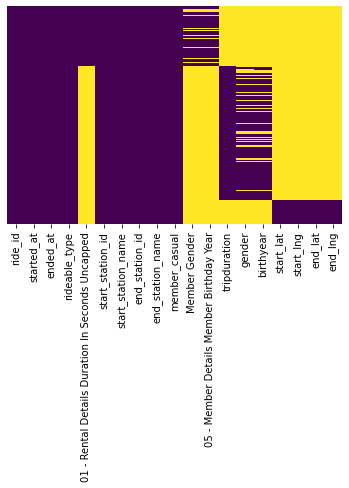

In [8]:
# check null values from dataset with a heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [9]:
# create copied dataset with the selected columns
selected_columns = ['ride_id', 'started_at', 'ended_at', 
                    'rideable_type', 'start_station_id', 'start_station_name', 
                    'end_station_id', 'end_station_name', 'member_casual']

data_ver1 = data[selected_columns]

### 3.1.3 Clean Up and Add Data to Prepare for Analysis

In [10]:
# check is there any duplicates
data_ver1.duplicated().sum()

0

In [11]:
# check null values again
data_ver1.isna().sum()

ride_id               0
started_at            0
ended_at              0
rideable_type         0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      1
member_casual         0
dtype: int64

In [12]:
# drop last null value from one column & confirm it
data_ver1.dropna(subset=['end_station_name'], inplace=True)
data_ver1['end_station_name'].isna().sum()

0

In [13]:
# change data type of two columns (start_at & ended_at)
for column in data_ver1.columns[1:3]:
    data_ver1[column] = pd.to_datetime(data_ver1[column])
    print(data_ver1[column].dtypes)

datetime64[ns]
datetime64[ns]


In [14]:
# find ride time
data_ver1['ride_length'] = data_ver1['ended_at'] - data_ver1['started_at']

In [15]:
# convert timedelta to seconds
data_ver1['ride_length'] = data_ver1['ride_length'].dt.total_seconds()

In [16]:
# reassign the desired values for data consistency
data_ver1['member_casual'] = data_ver1['member_casual'].replace(['Subscriber','Customer'], 
                                                                ['member','casual'])

In [17]:
# create month column & assign abbreviation
import calendar
data_ver1['month'] = data_ver1['started_at'].dt.month
data_ver1['month'] = data_ver1['month'].apply(lambda x: calendar.month_abbr[x])

In [18]:
# sort month column by months order
from pandas.api.types import CategoricalDtype
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
category_month = CategoricalDtype(categories=months, ordered=True)
data_ver1['month'] = data_ver1['month'].astype(category_month)

In [19]:
# create weekday column from start_at column
data_ver1['day_of_week'] = data_ver1['started_at'].dt.day_name()

In [20]:
# sort day_of_week column by days order
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
category_day = CategoricalDtype(categories=sorter, ordered=True)
data_ver1['day_of_week'] = data_ver1['day_of_week'].astype(category_day)

In [21]:
# create a column with hour of the day
data_ver1['hour'] = data_ver1['started_at'].dt.hour
data_ver1['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [22]:
# filter the dataset with two conditions
condition_a = data_ver1['start_station_name'] == 'HQ QR'
condition_b = data_ver1['ride_length'] < 0
filter_a = condition_a | condition_b
data_ver1 = data_ver1[~filter_a]

# Step 4: Analyze

## 4.1 Code

### 4.1.1 Conduct Descriptive Analysis

In [23]:
# view the dataset
data_ver1.head()

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,ride_length,month,day_of_week,hour
0,22178529,2019-04-01 00:02:00,2019-04-01 00:09:00,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,member,420.0,Apr,Monday,0
1,22178530,2019-04-01 00:03:00,2019-04-01 00:20:00,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,member,1020.0,Apr,Monday,0
2,22178531,2019-04-01 00:11:00,2019-04-01 00:15:00,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,member,240.0,Apr,Monday,0
3,22178532,2019-04-01 00:13:00,2019-04-01 00:18:00,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,member,300.0,Apr,Monday,0
4,22178533,2019-04-01 00:19:00,2019-04-01 00:36:00,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,member,1020.0,Apr,Monday,0


In [24]:
# description of dataset
data_ver1.describe()

,ride_length,hour
count,3.816454e+06,3.816454e+06
mean,1.476792e+03,1.374751e+01
std,3.115797e+04,4.709828e+00
min,1.000000e+00,0.000000e+00
25%,4.180000e+02,1.000000e+01
50%,7.160000e+02,1.500000e+01
75%,1.279000e+03,1.700000e+01
max,9.387024e+06,2.300000e+01


In [25]:
# top stations
top5_member_start = data_ver1[data_ver1['member_casual']=='member']['start_station_name'].value_counts().head(5)
print("Top 5 Member Start Station")
print(top5_member_start)
print("")

top5_member_return = data_ver1[data_ver1['member_casual']=='member']['end_station_name'].value_counts().head(5)
print("Top 5 Member Return Station")
print(top5_member_return)
print("")

top5_casual_start = data_ver1[data_ver1['member_casual']=='casual']['start_station_name'].value_counts().head(5)
print("Top 5 Casual Start Station")
print(top5_casual_start)
print("")

top5_casual_return = data_ver1[data_ver1['member_casual']=='casual']['end_station_name'].value_counts().head(5)
print("Top 5 Casual Return Station")
print(top5_casual_return)

Top 5 Member Start Station
Canal St & Adams St             51617
Clinton St & Madison St         45833
Clinton St & Washington Blvd    43291
Columbus Dr & Randolph St       30771
Franklin St & Monroe St         30760
Name: start_station_name, dtype: int64

Top 5 Member Return Station
Canal St & Adams St             48595
Clinton St & Washington Blvd    47343
Clinton St & Madison St         43969
Daley Center Plaza              30605
Kingsbury St & Kinzie St        30102
Name: end_station_name, dtype: int64

Top 5 Casual Start Station
Streeter Dr & Grand Ave      51919
Lake Shore Dr & Monroe St    38736
Millennium Park              21395
Michigan Ave & Oak St        20980
Shedd Aquarium               20281
Name: start_station_name, dtype: int64

Top 5 Casual Return Station
Streeter Dr & Grand Ave       65641
Lake Shore Dr & Monroe St     30311
Millennium Park               24987
Michigan Ave & Oak St         23231
Lake Shore Dr & North Blvd    22672
Name: end_station_name, dtype: int64


In [26]:
# analysis related to numbers of rides
member_percent =  (data_ver1[data_ver1['member_casual']=='member']\
                   ['ride_length'].count()/data_ver1['ride_length'].count()) * 100
casual_percent =  (data_ver1[data_ver1['member_casual']=='casual']\
                   ['ride_length'].count()/data_ver1['ride_length'].count()) * 100

print(f"Percentage of Member: {member_percent:.2f}%")
print(f"Percentage of Casual: {casual_percent:.2f}%")
print("")

total_member = data_ver1[data_ver1['member_casual']=='member']['ride_length'].count()
total_casual = data_ver1[data_ver1['member_casual']=='casual']['ride_length'].count()
print(f"Total Rides of Member: {total_member}")
print(f"Total Rides of Casual: {total_casual}")
print("")

rides_week = data_ver1.groupby('day_of_week')['ride_length'].count()
print(rides_week)
print("")

rides_month = data_ver1.groupby('month')['ride_length'].count()
print(rides_month)
print("")

rides_hours = data_ver1.groupby('hour')['ride_length'].count()
print(rides_hours)
print("")

Percentage of Member: 76.98%
Percentage of Casual: 23.02%

Total Rides of Member: 2937924
Total Rides of Casual: 878530

day_of_week
Sunday       435376
Monday       575492
Tuesday      598955
Wednesday    592786
Thursday     580483
Friday       557279
Saturday     476083
Name: ride_length, dtype: int64

month
Jan    143884
Feb    139028
Mar    140208
Apr    265310
May    367458
Jun    415807
Jul    557315
Aug    590184
Sep    493219
Oct    371786
Nov    177163
Dec    155092
Name: ride_length, dtype: int64

hour
0      23421
1      14074
2       8349
3       5373
4       7773
5      36786
6     109521
7     241101
8     307858
9     163487
10    144445
11    179781
12    207041
13    208173
14    207838
15    245550
16    377059
17    471929
18    312108
19    206781
20    132410
21     95382
22     68691
23     41523
Name: ride_length, dtype: int64



In [27]:
# analysis related to ride length
member_ridelength =  data_ver1[data_ver1['member_casual']=='member']\
                   ['ride_length'].mean()
casual_ridelength =  data_ver1[data_ver1['member_casual']=='casual']\
                   ['ride_length'].mean()

print(f"Average of Member's Ride Length: {member_ridelength:.2f}")
print(f"Average of Casual's Ride Length: {casual_ridelength:.2f}")
print("")

average_week = data_ver1.groupby('day_of_week')['ride_length'].mean()
print(average_week)
print("")

average_month = data_ver1.groupby('month')['ride_length'].mean()
print(average_month)
print("")

average_hours = data_ver1.groupby('hour')['ride_length'].mean()
print(average_hours)
print("")

Average of Member's Ride Length: 849.27
Average of Casual's Ride Length: 3575.31

day_of_week
Sunday       1998.363059
Monday       1296.642857
Tuesday      1244.773677
Wednesday    1275.484399
Thursday     1325.203646
Friday       1457.981551
Saturday     1966.987912
Name: ride_length, dtype: float64

month
Jan    1157.521663
Feb    1408.664176
Mar    1455.242632
Apr    1214.944706
May    1329.357804
Jun    1353.845606
Jul    1805.687261
Aug    1936.736652
Sep    1437.675653
Oct    1308.746405
Nov    1092.143986
Dec    1014.909222
Name: ride_length, dtype: float64

hour
0     2873.201785
1     2950.386813
2     3391.563301
3     4677.873627
4     1720.156696
5     1040.912059
6      906.421444
7      827.246507
8      954.876998
9     1367.598983
10    1839.199287
11    1682.392472
12    1743.344560
13    1789.842002
14    1890.389539
15    1729.249982
16    1388.176248
17    1385.160630
18    1386.571581
19    1511.920022
20    1616.162563
21    1721.175714
22    1758.288932
23    15

# Step 5: Share

## 5.1 Code

### 5.1.1 Data Visualization and Findings with Respect to Number of Rides

#### 5.1.1.1 members use the bikes more than casual riders do.

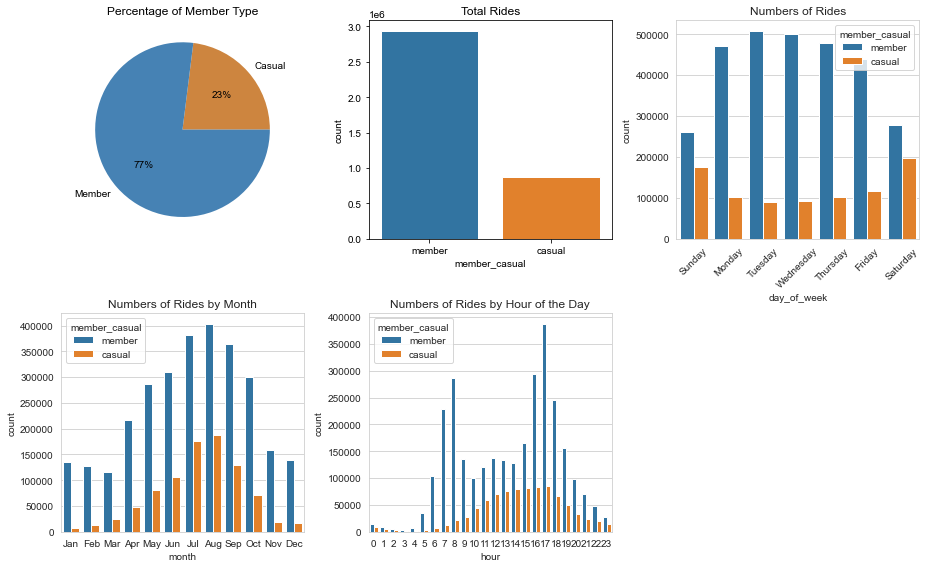

In [28]:
# visualization for number of rides
plt.figure(figsize=(13,8))

plt.subplot(2,3,1)
plt.pie(x=data_ver1.groupby('member_casual')['ride_length'].count(),
        labels=['Casual', 'Member'], autopct='%.0f%%', colors =['peru', 'steelblue'])
plt.title('Percentage of Member Type')

plt.subplot(2,3,2)
sns.set_style('whitegrid')
sns.countplot(x='member_casual', data=data_ver1).set_title('Total Rides')

plt.subplot(2,3,3)
sns.set_style('whitegrid')
sns.countplot(x='day_of_week', hue='member_casual', data=data_ver1).set_title('Numbers of Rides')
plt.xticks(rotation=45)

plt.subplot(2,3,4)
sns.set_style('whitegrid')
sns.countplot(x='month', hue='member_casual', data=data_ver1).set_title('Numbers of Rides by Month')

plt.subplot(2,3,5)
sns.set_style('whitegrid')
sns.countplot(x='hour', hue='member_casual',
              data=data_ver1).set_title('Numbers of Rides by Hour of the Day')

# plt.subplot(2,3,6)
# sns.set_style('whitegrid')
# sns.countplot(x='member_casual', hue='day_of_week', data=data_ver1)

plt.tight_layout()
plt.show()

#### 5.1.1.2 however, during weekends, casual riders uses the bikes as mush as members use.

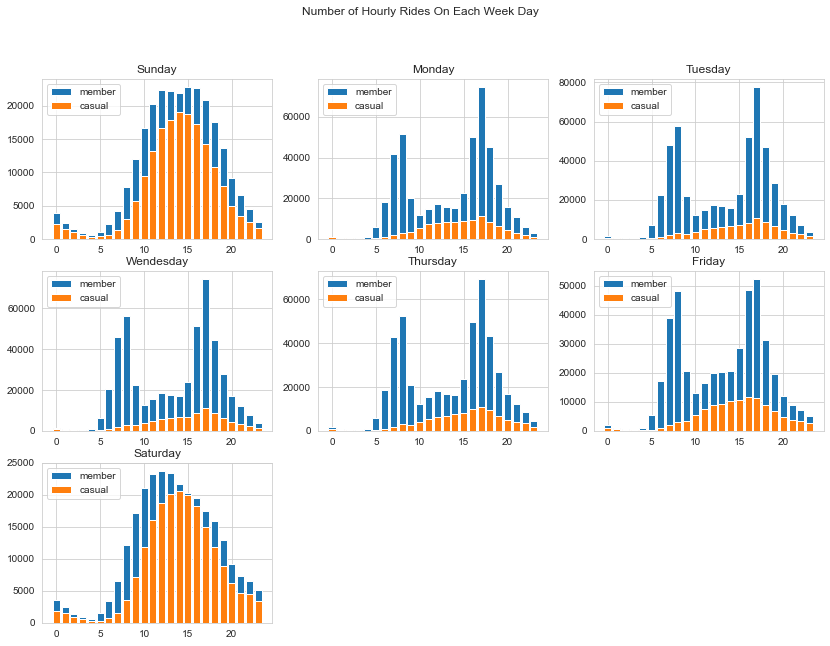

In [29]:
# visualization for hourly rides by each day of the week
x = data_ver1['hour'].unique()
y = data_ver1['day_of_week']
z = data_ver1['member_casual']

plt.figure(figsize=(14,10))

plt.subplot(3,3,1)
plt.bar(x, data_ver1[(y == y.unique()[-1]) & (z == z.unique()[0])]\
        .groupby('hour')['ride_length'].count(), label='member')
plt.bar(x, data_ver1[(y == y.unique()[-1]) & (z == z.unique()[1])]\
        .groupby('hour')['ride_length'].count(), label='casual')
plt.legend()
plt.title('Sunday')

plt.subplot(3,3,2)
plt.bar(x, data_ver1[(y == y.unique()[0]) & (z == z.unique()[0])]\
        .groupby('hour')['ride_length'].count(), label='member')
plt.bar(x, data_ver1[(y == y.unique()[0]) & (z == z.unique()[1])]\
        .groupby('hour')['ride_length'].count(), label='casual')
plt.legend()
plt.title('Monday')

plt.subplot(3,3,3)
plt.bar(x, data_ver1[(y == y.unique()[1]) & (z == z.unique()[0])]\
        .groupby('hour')['ride_length'].count(), label='member')
plt.bar(x, data_ver1[(y == y.unique()[1]) & (z == z.unique()[1])]\
        .groupby('hour')['ride_length'].count(), label='casual')
plt.legend()
plt.title('Tuesday')

plt.subplot(3,3,4)
plt.bar(x, data_ver1[(y == y.unique()[2]) & (z == z.unique()[0])]\
        .groupby('hour')['ride_length'].count(), label='member')
plt.bar(x, data_ver1[(y == y.unique()[2]) & (z == z.unique()[1])]\
        .groupby('hour')['ride_length'].count(), label='casual')
plt.legend()
plt.title('Wendesday')

plt.subplot(3,3,5)
plt.bar(x, data_ver1[(y == y.unique()[3]) & (z == z.unique()[0])]\
        .groupby('hour')['ride_length'].count(), label='member')
plt.bar(x, data_ver1[(y == y.unique()[3]) & (z == z.unique()[1])]\
        .groupby('hour')['ride_length'].count(), label='casual')
plt.legend()
plt.title('Thursday')

plt.subplot(3,3,6)
plt.bar(x, data_ver1[(y == y.unique()[4]) & (z == z.unique()[0])]\
        .groupby('hour')['ride_length'].count(), label='member')
plt.bar(x, data_ver1[(y == y.unique()[4]) & (z == z.unique()[1])]\
        .groupby('hour')['ride_length'].count(), label='casual')
plt.legend()
plt.title('Friday')

plt.subplot(3,3,7)
plt.bar(x, data_ver1[(y == y.unique()[5]) & (z == z.unique()[0])]\
        .groupby('hour')['ride_length'].count(), label='member')
plt.bar(x, data_ver1[(y == y.unique()[5]) & (z == z.unique()[1])]\
        .groupby('hour')['ride_length'].count(), label='casual')
plt.legend()
plt.title('Saturday')


plt.suptitle('Number of Hourly Rides On Each Week Day')
plt.show()

#### 5.1.1.3 the seasons of a year seems to affect the use of bikes. 

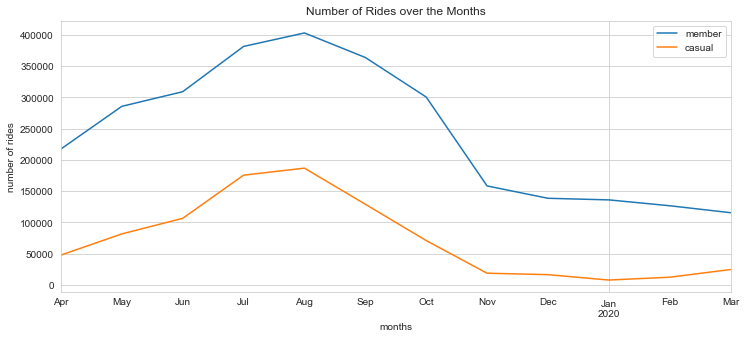

In [30]:
# number of rides over the months
plt.figure(figsize=(12,5))

data_ver1[data_ver1['member_casual'] == 'member']\
.groupby(pd.Grouper(key='started_at', axis=0, freq='M'))['ride_length'].count().plot(label='member')
data_ver1[data_ver1['member_casual'] == 'casual']\
.groupby(pd.Grouper(key='started_at', axis=0, freq='M'))['ride_length'].count().plot(label='casual')

plt.legend()
plt.xlabel('months')
plt.ylabel('number of rides')
plt.title('Number of Rides over the Months')
plt.show()

### 5.1.2 Datavisualization and Finding with Respect to Trip Duration

#### 5.1.2.1 casual riders have longer trip duration in everyway.

In [31]:
# converting duration from seconds to minutes
data_ver1['ride_length'] = data_ver1['ride_length'] / 60

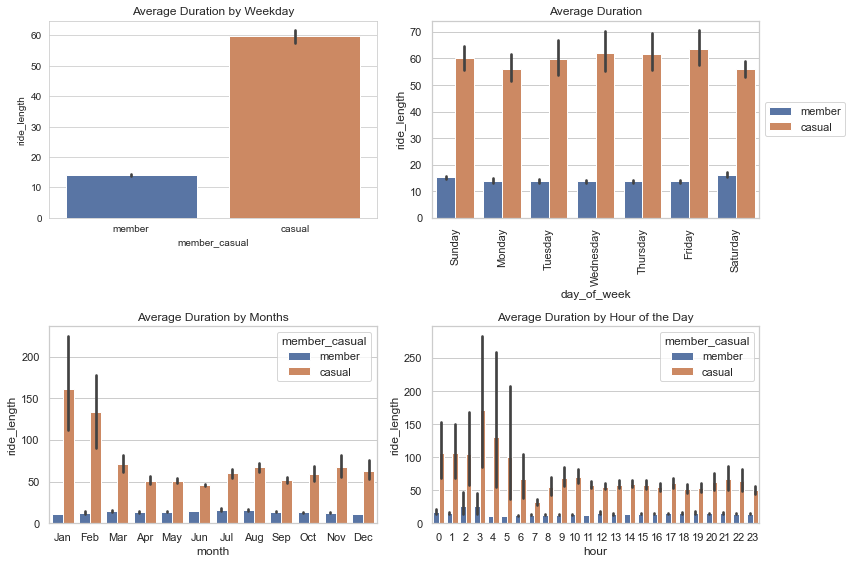

In [32]:
# visualization for average duration by member types

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.set_theme(style='whitegrid')
sns.barplot(x='member_casual', y='ride_length',
            data=data_ver1).set_title('Average Duration by Weekday')

plt.subplot(2,2,2)
sns.set_theme(style='whitegrid')
sns.barplot(x='day_of_week', y='ride_length', hue='member_casual',
            data=data_ver1).set_title('Average Duration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.set_theme(style='whitegrid')
sns.barplot(x='month', y='ride_length', hue='member_casual',
            data=data_ver1).set_title('Average Duration by Months')

plt.subplot(2,2,4)
sns.set_theme(style='whitegrid')
sns.barplot(x='hour', y='ride_length', hue='member_casual',
            data=data_ver1).set_title('Average Duration by Hour of the Day')

plt.tight_layout()
plt.show()

In [33]:
# prepare to remove outliers
Q1 = np.percentile(data_ver1['ride_length'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data_ver1['ride_length'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

C:\Users\peter\AppData\Local\Temp\ipykernel_9364\415662621.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data_ver1['ride_length'], 25, interpolation = 'midpoint')
C:\Users\peter\AppData\Local\Temp\ipykernel_9364\415662621.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data_ver1['ride_length'], 75, interpolation = 'midpoint')


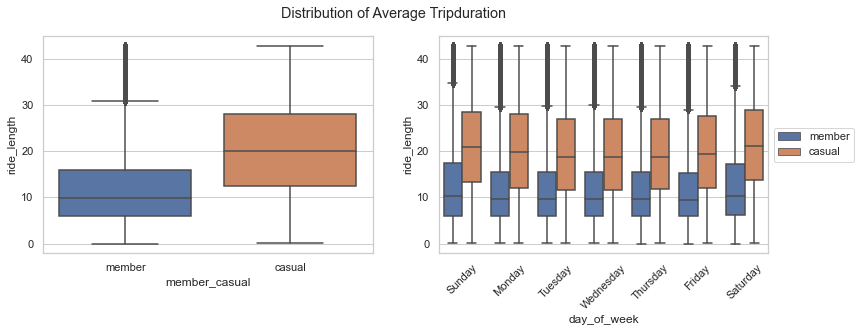

In [34]:
# visualization for distribution of average trip duration
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.boxplot(x='member_casual', y='ride_length', 
            data=data_ver1[(data_ver1['ride_length'] < (Q3+1.5*IQR)) 
                           & (data_ver1['ride_length'] > (Q1-1.5*IQR))])

plt.subplot(1,2,2)
sns.set_style('whitegrid')
sns.boxplot(x='day_of_week', y='ride_length',hue='member_casual', 
            data=data_ver1[(data_ver1['ride_length'] < (Q3+1.5*IQR)) 
                           & (data_ver1['ride_length'] > (Q1-1.5*IQR))])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)

plt.suptitle('Distribution of Average Tripduration')
plt.show()

#### 5.1.2.2 January of 2020 was a peak of trip duration for casual riders, but not for members.

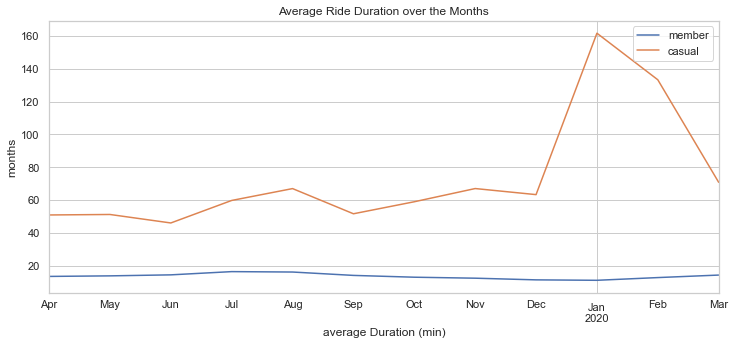

In [35]:
# change of ride duration over the months by member type
plt.figure(figsize=(12,5))

data_ver1[data_ver1['member_casual'] == 'member']\
.groupby(pd.Grouper(key='started_at', axis=0, freq='M'))['ride_length'].mean().plot(label='member')

data_ver1[data_ver1['member_casual'] == 'casual']\
.groupby(pd.Grouper(key='started_at', axis=0, freq='M'))['ride_length'].mean().plot(label='casual')

plt.legend()
plt.xlabel('average Duration (min)')
plt.ylabel('months')
plt.title('Average Ride Duration over the Months')

plt.show()

# Step 6: Act

#### 1. How do annual members and casual rider use Cyclistic bikes differently?
* Members use bikes regular, and as their the number of rides are higher on weekdays, particularly around 8 am and 5 pm of the day, they seem to bikes for going to work.
* The number of rides for casual riders are low, except on weekends, and their trip durations are significantly longer than that of members. So that it is highly possible they use bikes for pleasure.

#### 2. Why whould casual riders buy Cyclistic annual memberships?
* Casual riders would buy Cyclistic annual memberships if they have to use on a daily basic or if the rental rate for non-member was charged by trip duration since they have longer trip duartions.

#### 3. How can Cyclistic use digital media to influence casual riders to become members?
* In addition to charging rides by minutes, having the sign up fee waiver promotions and the mobile app subscription that provides information about the stations and bike lanes could influence casual riders to become members. 